In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_fs.csv to test_fs.csv
Saving train_fs.csv to train_fs.csv


In [ ]:
# Couple Split

In [ ]:
train = pd.read_csv(io.BytesIO(uploaded['train_cs.csv']))

In [ ]:
train.iloc[:, 0:58]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58
0,5,17,15,19,4,10,3,6,13,0,...,0,0,0,0,0,0,0,0,0,0
1,2,19,15,11,17,14,8,18,5,14,...,0,0,0,0,0,0,0,0,0,0
2,12,1,20,19,3,14,1,17,5,0,...,0,0,0,0,0,0,0,0,0,0
3,2,15,15,10,14,10,2,2,11,0,...,0,0,0,0,0,0,0,0,0,0
4,3,9,20,20,4,10,16,12,16,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,10,15,16,10,3,20,9,9,19,0,...,0,0,0,0,0,0,0,0,0,0
39996,2,11,2,15,8,8,12,12,12,0,...,0,0,0,0,0,0,0,0,0,0
39997,16,15,1,7,1,8,14,14,11,0,...,0,0,0,0,0,0,0,0,0,0
39998,7,11,1,8,10,8,10,11,17,20,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = pd.read_csv(io.BytesIO(uploaded['train_cs.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test_cs.csv']))
train_data = train.iloc[:, 0:58]
train_labels = train["X59"]
test_data = test.iloc[:, 0:58]
test_labels = test["X59"]
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
for i in range(len(train_labels)):
  if train_labels[i] == "Yes":
    train_labels[i] = 1
  else:
    train_labels[i] = 0
train_labels = np.array(train_labels, dtype = "uint8")
test_labels = np.array(test_labels)
for i in range(len(test_labels)):
  if test_labels[i] == "Yes":
    test_labels[i] = 1
  else:
    test_labels[i] = 0
test_labels = np.array(test_labels, dtype = "uint8")

In [ ]:
model = keras.Sequential([
                          layers.Dense(32, activation = "relu"),
                          layers.Dense(32, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(128, activation = "relu"),
                          layers.Dense(128, activation = "relu"),
                          layers.Dense(1, activation = "sigmoid")
])
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy", keras.metrics.Recall(name = "sensitivity"), keras.metrics.AUC(name = "AUC-ROC")])
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 512, validation_split=0.2)

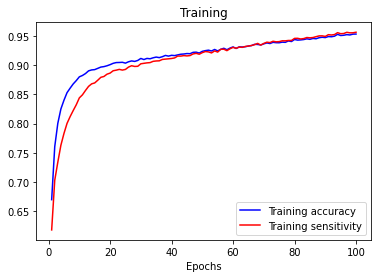

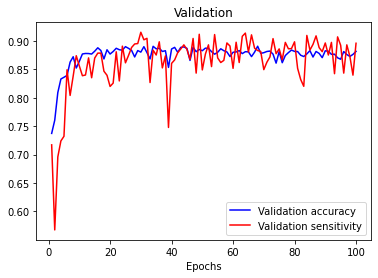

In [ ]:
history_dict = history.history
values = history_dict["accuracy"]
values2 = history_dict["sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Training accuracy")
plt.plot(epochs, values2, "r-", label="Training sensitivity")
plt.title("Training")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

history_dict = history.history
values = history_dict["val_accuracy"]
values2 = history_dict["val_sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Validation accuracy")
plt.plot(epochs, values2, "r-", label="Validation sensitivity")
plt.title("Validation")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_data, test_labels)
results

1209/1209 [==============================] - 2s 2ms/step - loss: 0.4889 - accuracy: 0.8674 - sensitivity: 0.8757 - AUC-ROC: 0.9321


[0.48893287777900696,
 0.8674131631851196,
 0.8757044672966003,
 0.9321210384368896]

In [ ]:
inputs = keras.Input(shape = (58, 1))
x = layers.Conv1D(filters = 32, kernel_size = 3, activation = "relu")(inputs)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy", keras.metrics.Recall(name = "sensitivity"), keras.metrics.AUC(name = "AUC-ROC")])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 58, 1)]           0         
                                                                 
 conv1d_10 (Conv1D)          (None, 56, 32)            128       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 28, 32)           0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 26, 64)            6208      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 13, 64)           0         
 1D)                                                             
                                                                 
 conv1d_12 (Conv1D)          (None, 11, 128)           2470

In [ ]:
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 512, validation_split=0.2)

Epoch 1/100
63/63 [==============================] - 9s 127ms/step - loss: 0.6251 - accuracy: 0.6612 - sensitivity: 0.6003 - AUC-ROC: 0.7247 - val_loss: 0.4813 - val_accuracy: 0.7649 - val_sensitivity: 0.7863 - val_AUC-ROC: 0.8489
Epoch 2/100
63/63 [==============================] - 8s 121ms/step - loss: 0.4232 - accuracy: 0.8121 - sensitivity: 0.7343 - AUC-ROC: 0.8731 - val_loss: 0.4151 - val_accuracy: 0.8199 - val_sensitivity: 0.6729 - val_AUC-ROC: 0.8926
Epoch 3/100
63/63 [==============================] - 8s 120ms/step - loss: 0.3629 - accuracy: 0.8457 - sensitivity: 0.7877 - AUC-ROC: 0.9111 - val_loss: 0.3331 - val_accuracy: 0.8645 - val_sensitivity: 0.8095 - val_AUC-ROC: 0.9266
Epoch 4/100
63/63 [==============================] - 8s 122ms/step - loss: 0.3283 - accuracy: 0.8667 - sensitivity: 0.8266 - AUC-ROC: 0.9290 - val_loss: 0.3786 - val_accuracy: 0.8374 - val_sensitivity: 0.9046 - val_AUC-ROC: 0.9267
Epoch 5/100
63/63 [==============================] - 8s 121ms/step - loss: 0

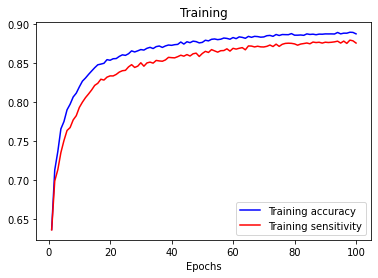

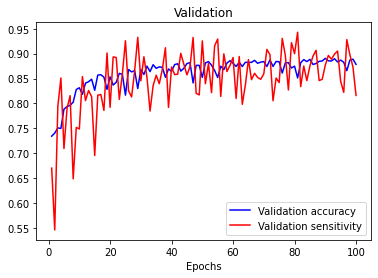

In [ ]:
history_dict = history.history
values = history_dict["accuracy"]
values2 = history_dict["sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Training accuracy")
plt.plot(epochs, values2, "r-", label="Training sensitivity")
plt.title("Training")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

history_dict = history.history
values = history_dict["val_accuracy"]
values2 = history_dict["val_sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Validation accuracy")
plt.plot(epochs, values2, "r-", label="Validation sensitivity")
plt.title("Validation")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_data, test_labels)
results

1209/1209 [==============================] - 5s 4ms/step - loss: 1.0348 - accuracy: 0.8722 - sensitivity: 0.8725 - AUC-ROC: 0.9130


[1.0347899198532104,
 0.8721715211868286,
 0.8725214004516602,
 0.9130059480667114]

In [ ]:
# Epitope Split

In [ ]:
train = pd.read_csv(io.BytesIO(uploaded['train_es.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test_es.csv']))
train_data = train.iloc[:, 0:58]
train_labels = train["X59"]
test_data = test.iloc[:, 0:58]
test_labels = test["X59"]
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
for i in range(len(train_labels)):
  if train_labels[i] == "Yes":
    train_labels[i] = 1
  else:
    train_labels[i] = 0
train_labels = np.array(train_labels, dtype = "uint8")
test_labels = np.array(test_labels)
for i in range(len(test_labels)):
  if test_labels[i] == "Yes":
    test_labels[i] = 1
  else:
    test_labels[i] = 0
test_labels = np.array(test_labels, dtype = "uint8")

In [ ]:
model = keras.Sequential([
                          layers.Dense(32, activation = "relu"),
                          layers.Dense(32, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(128, activation = "relu"),
                          layers.Dense(128, activation = "relu"),
                          layers.Dense(1, activation = "sigmoid")
])
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy", keras.metrics.Recall(name = "sensitivity"), keras.metrics.AUC(name = "AUC-ROC")])
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 512, validation_split = 0.2)

Epoch 1/100
103/103 [==============================] - 3s 11ms/step - loss: 0.5521 - accuracy: 0.7024 - sensitivity: 0.6778 - AUC-ROC: 0.7834 - val_loss: 0.4568 - val_accuracy: 0.7742 - val_sensitivity: 0.6635 - val_AUC-ROC: 0.8622
Epoch 2/100
103/103 [==============================] - 1s 7ms/step - loss: 0.4337 - accuracy: 0.7964 - sensitivity: 0.7505 - AUC-ROC: 0.8745 - val_loss: 0.4414 - val_accuracy: 0.7871 - val_sensitivity: 0.8795 - val_AUC-ROC: 0.8971
Epoch 3/100
103/103 [==============================] - 1s 8ms/step - loss: 0.3790 - accuracy: 0.8340 - sensitivity: 0.7960 - AUC-ROC: 0.9058 - val_loss: 0.3459 - val_accuracy: 0.8511 - val_sensitivity: 0.8126 - val_AUC-ROC: 0.9217
Epoch 4/100
103/103 [==============================] - 1s 7ms/step - loss: 0.3446 - accuracy: 0.8540 - sensitivity: 0.8174 - AUC-ROC: 0.9227 - val_loss: 0.3620 - val_accuracy: 0.8398 - val_sensitivity: 0.7648 - val_AUC-ROC: 0.9194
Epoch 5/100
103/103 [==============================] - 1s 8ms/step - loss: 

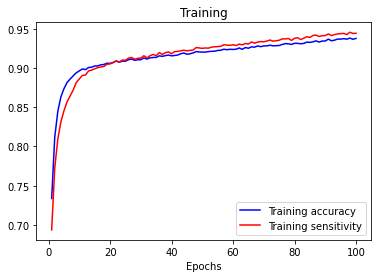

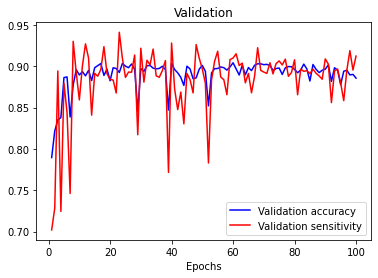

In [ ]:
history_dict = history.history
values = history_dict["accuracy"]
values2 = history_dict["sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Training accuracy")
plt.plot(epochs, values2, "r-", label="Training sensitivity")
plt.title("Training")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

history_dict = history.history
values = history_dict["val_accuracy"]
values2 = history_dict["val_sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Validation accuracy")
plt.plot(epochs, values2, "r-", label="Validation sensitivity")
plt.title("Validation")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_data, test_labels)
results

414/414 [==============================] - 1s 2ms/step - loss: 17.3106 - accuracy: 0.6064 - sensitivity: 0.0520 - AUC-ROC: 0.4004


[17.31058120727539,
 0.6063838005065918,
 0.052040595561265945,
 0.400377482175827]

In [ ]:
inputs = keras.Input(shape = (58, 1))
x = layers.Conv1D(filters = 32, kernel_size = 3, activation = "relu")(inputs)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy", keras.metrics.Recall(name = "sensitivity"), keras.metrics.AUC(name = "AUC-ROC")])
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 512, validation_split = 0.2)

Epoch 1/100
103/103 [==============================] - 16s 123ms/step - loss: 0.5269 - accuracy: 0.7248 - sensitivity: 0.7082 - AUC-ROC: 0.8055 - val_loss: 0.3595 - val_accuracy: 0.8420 - val_sensitivity: 0.7487 - val_AUC-ROC: 0.9125
Epoch 2/100
103/103 [==============================] - 12s 118ms/step - loss: 0.3461 - accuracy: 0.8563 - sensitivity: 0.8162 - AUC-ROC: 0.9200 - val_loss: 0.3010 - val_accuracy: 0.8844 - val_sensitivity: 0.8720 - val_AUC-ROC: 0.9461
Epoch 3/100
103/103 [==============================] - 12s 119ms/step - loss: 0.2930 - accuracy: 0.8820 - sensitivity: 0.8630 - AUC-ROC: 0.9453 - val_loss: 0.3144 - val_accuracy: 0.8805 - val_sensitivity: 0.8196 - val_AUC-ROC: 0.9502
Epoch 4/100
103/103 [==============================] - 12s 119ms/step - loss: 0.2692 - accuracy: 0.8936 - sensitivity: 0.8886 - AUC-ROC: 0.9542 - val_loss: 0.2744 - val_accuracy: 0.8940 - val_sensitivity: 0.9384 - val_AUC-ROC: 0.9605
Epoch 5/100
103/103 [==============================] - 12s 119ms

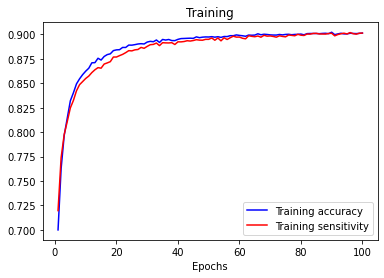

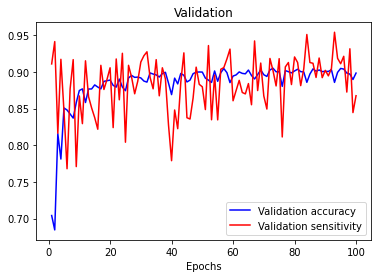

In [ ]:
history_dict = history.history
values = history_dict["accuracy"]
values2 = history_dict["sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Training accuracy")
plt.plot(epochs, values2, "r-", label="Training sensitivity")
plt.title("Training")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

history_dict = history.history
values = history_dict["val_accuracy"]
values2 = history_dict["val_sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Validation accuracy")
plt.plot(epochs, values2, "r-", label="Validation sensitivity")
plt.title("Validation")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_data, test_labels)
results

414/414 [==============================] - 2s 4ms/step - loss: 5.9341 - accuracy: 0.6127 - sensitivity: 0.0818 - AUC-ROC: 0.4881


[5.9340596199035645,
 0.6127372980117798,
 0.08183977752923965,
 0.4881269633769989]

In [ ]:
# TCR Split

In [ ]:
train = pd.read_csv(io.BytesIO(uploaded['train_ts.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test_ts.csv']))
train_data = train.iloc[:, 0:58]
train_labels = train["X59"]
test_data = test.iloc[:, 0:58]
test_labels = test["X59"]
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
for i in range(len(train_labels)):
  if train_labels[i] == "Yes":
    train_labels[i] = 1
  else:
    train_labels[i] = 0
train_labels = np.array(train_labels, dtype = "uint8")
test_labels = np.array(test_labels)
for i in range(len(test_labels)):
  if test_labels[i] == "Yes":
    test_labels[i] = 1
  else:
    test_labels[i] = 0
test_labels = np.array(test_labels, dtype = "uint8")

In [ ]:
model = keras.Sequential([
                          layers.Dense(32, activation = "relu"),
                          layers.Dense(32, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(128, activation = "relu"),
                          layers.Dense(128, activation = "relu"),
                          layers.Dense(1, activation = "sigmoid")
])
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy", keras.metrics.Recall(name = "sensitivity"), keras.metrics.AUC(name = "AUC-ROC")])
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 512, validation_split = 0.2)

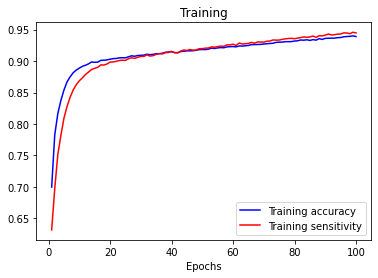

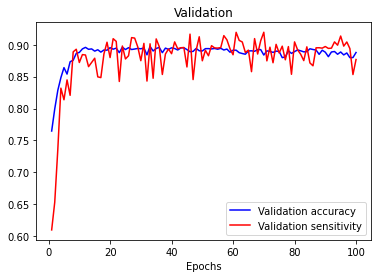

In [ ]:
history_dict = history.history
values = history_dict["accuracy"]
values2 = history_dict["sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Training accuracy")
plt.plot(epochs, values2, "r-", label="Training sensitivity")
plt.title("Training")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

history_dict = history.history
values = history_dict["val_accuracy"]
values2 = history_dict["val_sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Validation accuracy")
plt.plot(epochs, values2, "r-", label="Validation sensitivity")
plt.title("Validation")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_data, test_labels)
results

7/7 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8647 - sensitivity: 0.8704 - AUC-ROC: 0.9421


[0.37292900681495667,
 0.8647342920303345,
 0.8703703880310059,
 0.942106306552887]

In [ ]:
inputs = keras.Input(shape = (58, 1))
x = layers.Conv1D(filters = 32, kernel_size = 3, activation = "relu")(inputs)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy", keras.metrics.Recall(name = "sensitivity"), keras.metrics.AUC(name = "AUC-ROC")])
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 512, validation_split = 0.2)

Epoch 1/100
123/123 [==============================] - 17s 122ms/step - loss: 0.5364 - accuracy: 0.7216 - sensitivity: 0.6699 - AUC-ROC: 0.7977 - val_loss: 0.3598 - val_accuracy: 0.8535 - val_sensitivity: 0.7864 - val_AUC-ROC: 0.9112
Epoch 2/100
123/123 [==============================] - 15s 118ms/step - loss: 0.3498 - accuracy: 0.8549 - sensitivity: 0.8067 - AUC-ROC: 0.9189 - val_loss: 0.3306 - val_accuracy: 0.8676 - val_sensitivity: 0.8564 - val_AUC-ROC: 0.9293
Epoch 3/100
123/123 [==============================] - 15s 119ms/step - loss: 0.3088 - accuracy: 0.8757 - sensitivity: 0.8483 - AUC-ROC: 0.9392 - val_loss: 0.3077 - val_accuracy: 0.8824 - val_sensitivity: 0.8296 - val_AUC-ROC: 0.9466
Epoch 4/100
123/123 [==============================] - 15s 119ms/step - loss: 0.2873 - accuracy: 0.8847 - sensitivity: 0.8690 - AUC-ROC: 0.9478 - val_loss: 0.2694 - val_accuracy: 0.8901 - val_sensitivity: 0.8829 - val_AUC-ROC: 0.9552
Epoch 5/100
123/123 [==============================] - 15s 119ms

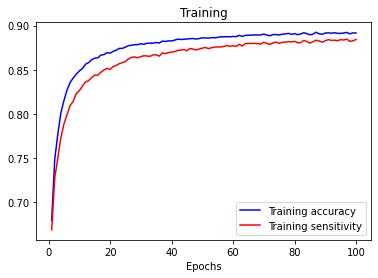

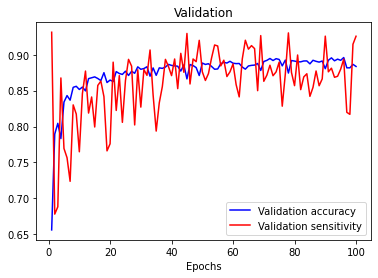

In [ ]:
history_dict = history.history
values = history_dict["accuracy"]
values2 = history_dict["sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Training accuracy")
plt.plot(epochs, values2, "r-", label="Training sensitivity")
plt.title("Training")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

history_dict = history.history
values = history_dict["val_accuracy"]
values2 = history_dict["val_sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Validation accuracy")
plt.plot(epochs, values2, "r-", label="Validation sensitivity")
plt.title("Validation")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_data, test_labels)
results

7/7 [==============================] - 0s 4ms/step - loss: 1.2474 - accuracy: 0.8889 - sensitivity: 0.8796 - AUC-ROC: 0.9217


[1.247422218322754, 0.8888888955116272, 0.8796296119689941, 0.9217171669006348]

In [ ]:
# Full Split

In [ ]:
train = pd.read_csv(io.BytesIO(uploaded['train_fs.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test_fs.csv']))
train_data = train.iloc[:, 0:58]
train_labels = train["X59"]
test_data = test.iloc[:, 0:58]
test_labels = test["X59"]
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
for i in range(len(train_labels)):
  if train_labels[i] == "Yes":
    train_labels[i] = 1
  else:
    train_labels[i] = 0
train_labels = np.array(train_labels, dtype = "uint8")
test_labels = np.array(test_labels)
for i in range(len(test_labels)):
  if test_labels[i] == "Yes":
    test_labels[i] = 1
  else:
    test_labels[i] = 0
test_labels = np.array(test_labels, dtype = "uint8")

In [ ]:
train

In [ ]:
test

In [ ]:
model = keras.Sequential([
                          layers.Dense(32, activation = "relu"),
                          layers.Dense(32, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(128, activation = "relu"),
                          layers.Dense(128, activation = "relu"),
                          layers.Dense(1, activation = "sigmoid")
])
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy", keras.metrics.Recall(name = "sensitivity"), keras.metrics.AUC(name = "AUC-ROC")])
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 512, validation_split = 0.2)

Epoch 1/100
87/87 [==============================] - 3s 11ms/step - loss: 0.5379 - accuracy: 0.7280 - sensitivity: 0.8102 - AUC-ROC: 0.7942 - val_loss: 0.4333 - val_accuracy: 0.7956 - val_sensitivity: 0.8459 - val_AUC-ROC: 0.8820
Epoch 2/100
87/87 [==============================] - 1s 6ms/step - loss: 0.3813 - accuracy: 0.8303 - sensitivity: 0.8307 - AUC-ROC: 0.9047 - val_loss: 0.3609 - val_accuracy: 0.8489 - val_sensitivity: 0.8295 - val_AUC-ROC: 0.9191
Epoch 3/100
87/87 [==============================] - 1s 6ms/step - loss: 0.3317 - accuracy: 0.8583 - sensitivity: 0.8583 - AUC-ROC: 0.9287 - val_loss: 0.3181 - val_accuracy: 0.8676 - val_sensitivity: 0.8416 - val_AUC-ROC: 0.9346
Epoch 4/100
87/87 [==============================] - 1s 6ms/step - loss: 0.3035 - accuracy: 0.8742 - sensitivity: 0.8719 - AUC-ROC: 0.9406 - val_loss: 0.2993 - val_accuracy: 0.8789 - val_sensitivity: 0.9242 - val_AUC-ROC: 0.9487
Epoch 5/100
87/87 [==============================] - 1s 6ms/step - loss: 0.2843 - a

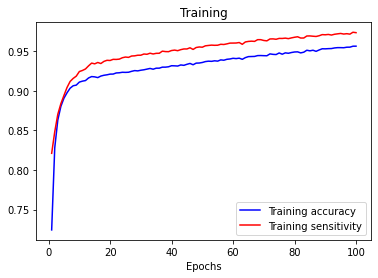

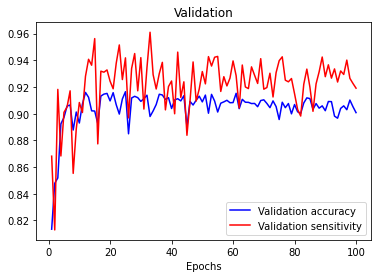

In [ ]:
history_dict = history.history
values = history_dict["accuracy"]
values2 = history_dict["sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Training accuracy")
plt.plot(epochs, values2, "r-", label="Training sensitivity")
plt.title("Training")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

history_dict = history.history
values = history_dict["val_accuracy"]
values2 = history_dict["val_sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Validation accuracy")
plt.plot(epochs, values2, "r-", label="Validation sensitivity")
plt.title("Validation")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_data, test_labels)
results

735/735 [==============================] - 1s 2ms/step - loss: 3.1361 - accuracy: 0.6792 - sensitivity: 0.2449 - AUC-ROC: 0.5494


[3.1360530853271484, 0.6791537404060364, 0.2448979616165161, 0.549367368221283]

In [ ]:
inputs = keras.Input(shape = (58, 1))
x = layers.Conv1D(filters = 32, kernel_size = 3, activation = "relu")(inputs)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Conv1D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy", keras.metrics.Recall(name = "sensitivity"), keras.metrics.AUC(name = "AUC-ROC")])
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 512, validation_split = 0.2)

Epoch 1/100
87/87 [==============================] - 17s 157ms/step - loss: 0.5234 - accuracy: 0.7392 - sensitivity: 0.8445 - AUC-ROC: 0.8115 - val_loss: 0.3287 - val_accuracy: 0.8628 - val_sensitivity: 0.8345 - val_AUC-ROC: 0.9263
Epoch 2/100
87/87 [==============================] - 10s 115ms/step - loss: 0.3098 - accuracy: 0.8715 - sensitivity: 0.8654 - AUC-ROC: 0.9370 - val_loss: 0.2680 - val_accuracy: 0.8939 - val_sensitivity: 0.8890 - val_AUC-ROC: 0.9560
Epoch 3/100
87/87 [==============================] - 10s 116ms/step - loss: 0.2669 - accuracy: 0.8958 - sensitivity: 0.9055 - AUC-ROC: 0.9538 - val_loss: 0.2507 - val_accuracy: 0.9030 - val_sensitivity: 0.9105 - val_AUC-ROC: 0.9603
Epoch 4/100
87/87 [==============================] - 10s 116ms/step - loss: 0.2492 - accuracy: 0.9037 - sensitivity: 0.9167 - AUC-ROC: 0.9597 - val_loss: 0.2405 - val_accuracy: 0.9065 - val_sensitivity: 0.8981 - val_AUC-ROC: 0.9644
Epoch 5/100
87/87 [==============================] - 10s 116ms/step - lo

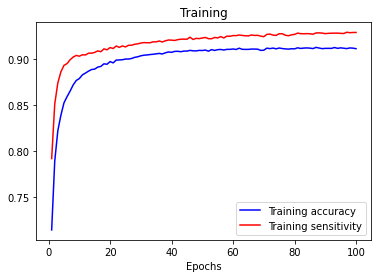

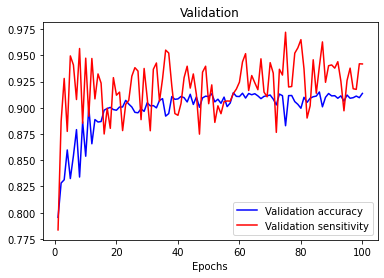

In [ ]:
history_dict = history.history
values = history_dict["accuracy"]
values2 = history_dict["sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Training accuracy")
plt.plot(epochs, values2, "r-", label="Training sensitivity")
plt.title("Training")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

history_dict = history.history
values = history_dict["val_accuracy"]
values2 = history_dict["val_sensitivity"]
epochs = range(1, len(values) + 1)
plt.plot(epochs, values, "b-", label="Validation accuracy")
plt.plot(epochs, values2, "r-", label="Validation sensitivity")
plt.title("Validation")
plt.xlabel("Epochs")
plt.ylabel("")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_data, test_labels)
results

735/735 [==============================] - 3s 4ms/step - loss: 4.9635 - accuracy: 0.7008 - sensitivity: 0.1323 - AUC-ROC: 0.5249


[4.9634528160095215,
 0.7007790207862854,
 0.13232389092445374,
 0.5249326229095459]